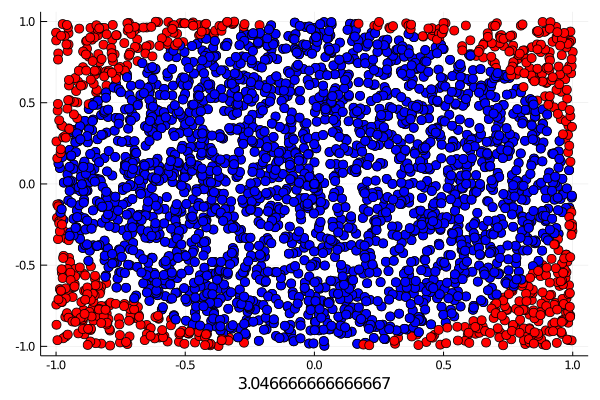

In [48]:
using Pkg
Pkg.add("Distributions")
Pkg.add("Plots")

using Plots
using Distributions

#CONFIGURACION PLOT
default(show=:ijulia)
limites_x = (-1, 1)
limites_y = (-1, 1)
colores = ["red","blue"]
markersize = [7,9]

#CONFIGURACION SIMULACION
cantidad_de_muestras_por_frame = 100
cantidad_frames = 30
cantidad_numeros_aleatorios = cantidad_de_muestras_por_frame * cantidad_frames
aleatorios_x = rand(Uniform(-1.0,1.0),cantidad_numeros_aleatorios)
aleatorios_y = rand(Uniform(-1.0,1.0),cantidad_numeros_aleatorios)

#ACUMULADOR DE PUNTOS
acumulador_puntos_x = zeros(Float64, (2, cantidad_numeros_aleatorios)) # en el subindice 1 pongo los del circulo, en el 2 pongo los del cuadrado
acumulador_puntos_y = zeros(Float64, (2, cantidad_numeros_aleatorios)) # en el subindice 1 pongo los del circulo, en el 2 pongo los del cuadrado
println(acumulador_puntos_x[1,1:end])
#ci = scatter(1,1,leg = false,color="red",xlims = xlims, ylims = ylims)

veces_que_cayo_en_circulo = 0
pi_calculado = 0
i = 0

for i_frame in 1:(cantidad_frames)
    for i_muestra in 1:(cantidad_de_muestras_por_frame)
        global i +=1
        #println(aleatorios_x[1:i])
        x = aleatorios_x[i]
        y = aleatorios_y[i]
        r2 = sqrt(x*x + y*y)  # radius squared, in radial coordinates
        if r2 <= 1.0
            global veces_que_cayo_en_circulo += 1
            acumulador_puntos_x[2,i] = x
            acumulador_puntos_y[2,i] = y

            #ci = scatter(aleatorios_x[1:i],aleatorios_y[1:i],leg = false,color="red",xlims = xlims, ylims = ylims)
        end
        acumulador_puntos_x[1,i] = x
        acumulador_puntos_y[1,i] = y

        
        global pi_calculado = ((veces_que_cayo_en_circulo*4) / i)
    end
    
    ci = scatter(acumulador_puntos_x[1:2,1:i],
                acumulador_puntos_y[1:2,1:i],                
                leg = false, 
                markersize=[5,5], color=["red","blue"],xlims = xlims, ylims = ylims)
    
    xlabel!(string(pi_calculado)) 
end
